<a href="https://colab.research.google.com/github/Pinegraphite123/TRGN515/blob/main/W3_HWproblems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## W3_HW9

Go ahead and modify three plots of your choice from this week's lecture by using what we have learned and also add at least three additional features from the matplotlib gallery that we have not covered in the lecture!

Here are some tips for colors:

Colors can be specified by single letters:

    k - black
    w - white
    c - cyan
    m - magenta
    b - blue
    r - red
    y - yellow

or by html color codes ('red', 'orange', 'steelblue', etc)

or by hex color codes (#BDA493, #63C638, etc - A very handy color picker can be found here)

In [3]:
import pandas as pd
df_asthma = pd.read_csv("/content/asthma.csv")
df_asthma.head()

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,"117,854",40.0,7,28


In [4]:
df_asthma['Strata Name'].unique()

array(['18 and Over', 'African-American',
       'American Indian/Alaskan Native', 'Asian/Pacific Islander',
       'Hispanic', 'White', 'Female', 'Male', 'All Ages', 'Under 18',
       'Multiracial'], dtype=object)

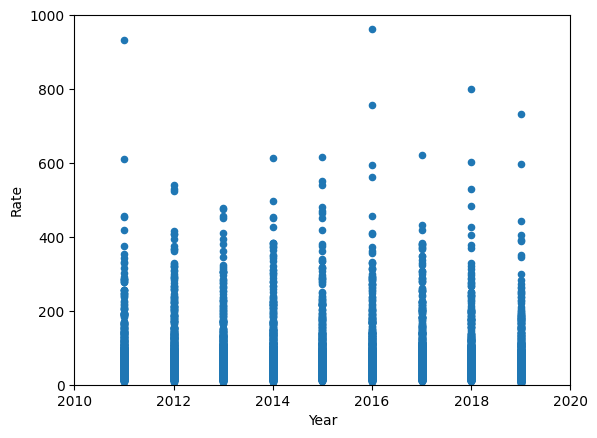

In [5]:
import matplotlib.pyplot as plt
df_subset = df_asthma[df_asthma['Strata Name']=='All Ages']
df_pivot = df_subset.pivot( values='Rate', columns='Year', index='Geography')
df_asthma.plot(x='Year', y='Rate', kind='scatter')
plt.axis([2010,2020,0,1000])
plt.show()

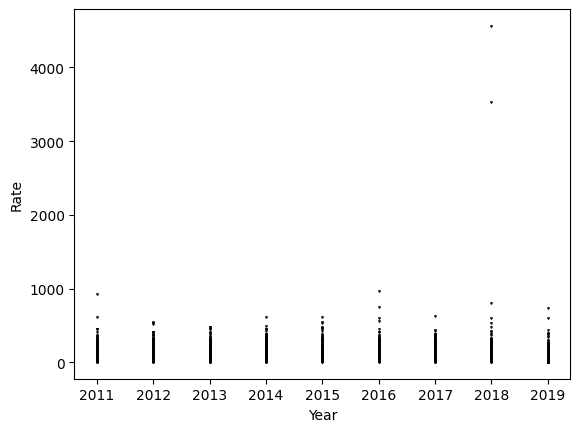

In [6]:
# Modify above by changing color and marker
x1 = df_asthma.plot(x='Year', y='Rate', kind='scatter', color='k', marker="v", s=1)
# autoscale function so no need to set axis limit manually
x1.autoscale()
plt.show()

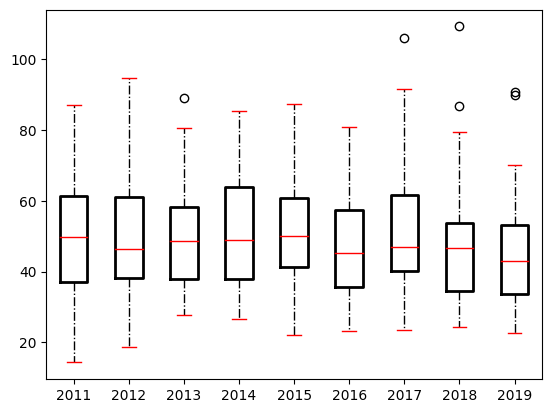

In [7]:
df_pivot.plot(kind='box',
              color=dict(boxes='#BDA493', whiskers='g', medians='red', caps='red'),
              boxprops=dict(linestyle='-',linewidth=2.0, ),
              whiskerprops=dict(linestyle='-.',linewidth=1.0,)
             )
plt.show()

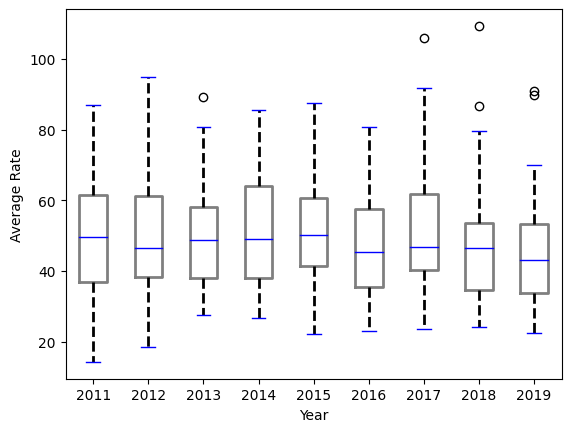

In [8]:
# Modify above by changing colors and transparency and adding axis label
x2 = df_pivot.plot(kind='box',
              color=dict(boxes='#7F00FF', whiskers='k', medians='blue', caps='blue'),
              boxprops=dict(linestyle='-',linewidth=2.0, alpha=0.5 ),
              whiskerprops=dict(linestyle='--',linewidth=2.0,)
             )
plt.xlabel("Year")
plt.ylabel("Average Rate")
plt.show()

In [9]:
df_pivot.head()


Year,2011,2012,2013,2014,2015,2016,2017,2018,2019
Geography,,,,,,,,,
Alameda,61.6,65.2,64.7,64.5,64.3,57.8,56.3,48.6,45.8
Amador,66.7,83.5,78.6,64.4,58.4,61.8,56.8,44.3,53.2
Butte,53.5,45.7,46.7,47.2,50.2,38.1,45.3,42.2,35.5
Calaveras,58.4,43.5,57.4,55.1,48.0,45.3,55.1,52.3,58.4
California,48.1,49.8,48.7,49.5,50.4,45.8,46.9,42.4,42.6


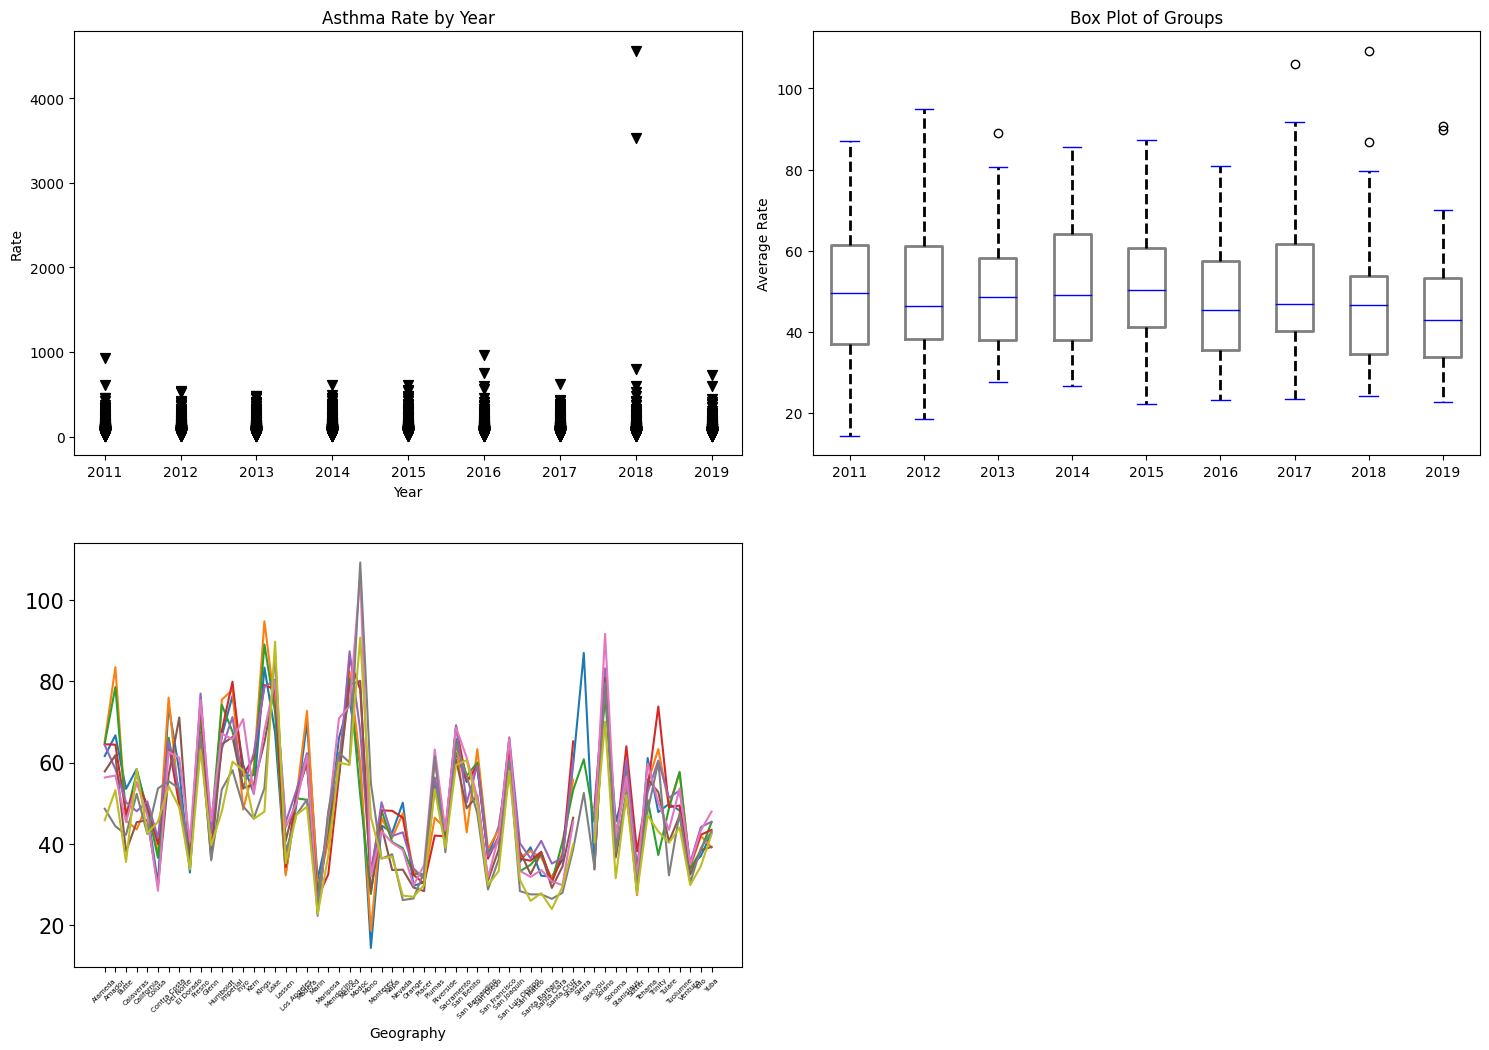

In [10]:
# combining three plots, one is from a subplot in lecture

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3,2,1)
df_asthma.plot(ax=ax1, x='Year', y='Rate', kind='scatter', color='k', marker="v", s=50)
ax1.set_title('Asthma Rate by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rate')

ax2 = fig.add_subplot(3,2,2)
df_pivot.plot(kind='box', ax=ax2,
              color=dict(boxes='#7F00FF', whiskers='k', medians='blue', caps='blue'),
              boxprops=dict(linestyle='-',linewidth=2.0, alpha=0.5),
              whiskerprops=dict(linestyle='--',linewidth=2.0,)
             )
ax2.set_title('Box Plot of Groups')
ax2.set_ylabel('Average Rate')

# modifying this one by displaying all the x ticks, although not quite readable
ax3 = fig.add_subplot(3,2,3)
df_pivot.plot(ax=ax3, legend=None, fontsize=15)
ax3.set_xticks(range(len(df_pivot.index)))
ax3.tick_params(axis='x', labelsize=5)
ax3.set_xticklabels(df_pivot.index, rotation=45)


plt.tight_layout()
plt.show()

## W3_HW10

Can you create a graph that shows the ED admission rate for each county, plotting under 18 against 18 and over, displaying separately each sex?
Use asthma.csv file in the datasets folder.

In [11]:
df_asthma

,LGHC Indicator Name,Geography,Year,Age Group,Strata,Strata Name,Numerator,Rate,LGHC Indicator ID,LGHC Target Rate
0,Asthma ED Visit Rates,Alameda,2015,18 and Over,Total Population,18 and Over,"6,513",53.1,7,28
1,Asthma ED Visit Rates,Amador,2015,18 and Over,Total Population,18 and Over,151,49.1,7,28
2,Asthma ED Visit Rates,Butte,2015,18 and Over,Total Population,18 and Over,736,43.8,7,28
3,Asthma ED Visit Rates,Calaveras,2015,18 and Over,Total Population,18 and Over,139,42.7,7,28
4,Asthma ED Visit Rates,California,2015,18 and Over,Total Population,18 and Over,"117,854",40.0,7,28
...,...,...,...,...,...,...,...,...,...,...
9479,Asthma ED Visit Rates,Tulare,2019,Under 18,Sex,Male,597,81.2,7,28
9480,Asthma ED Visit Rates,Tuolumne,2019,Under 18,Sex,Male,37,90.0,7,28
9481,Asthma ED Visit Rates,Ventura,2019,Under 18,Sex,Male,602,61.0,7,28
9482,Asthma ED Visit Rates,Yolo,2019,Under 18,Sex,Male,135,52.4,7,28


In [12]:
df_asthma_sex = df_asthma.loc[(df_asthma['Strata'] == "Sex")]
df_asthma_cleaned = df_asthma_sex[["Geography", "Strata Name", "Rate", "Age Group"]]
df_asthma_cleaned

,Geography,Strata Name,Rate,Age Group
243,Alameda,Female,60.5,18 and Over
244,Amador,Female,79.4,18 and Over
245,Butte,Female,52.6,18 and Over
246,Calaveras,Female,59.4,18 and Over
247,California,Female,49.2,18 and Over
...,...,...,...,...
9479,Tulare,Male,81.2,Under 18
9480,Tuolumne,Male,90.0,Under 18
9481,Ventura,Male,61.0,Under 18
9482,Yolo,Male,52.4,Under 18


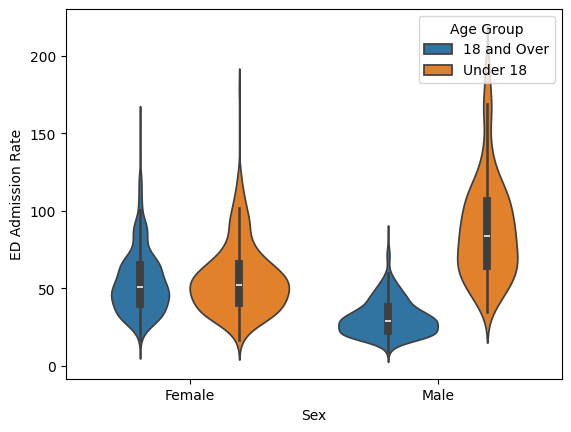

In [16]:
import seaborn as sns

hue_order = ["18 and Over", "Under 18"]
sns.violinplot(data=df_asthma_cleaned, x="Strata Name", y="Rate", hue="Age Group", hue_order=hue_order)
plt.ylabel('ED Admission Rate')
plt.xlabel('Sex')
plt.show()

# W3_HW11

Can you make the following boxplot look similar to the one we created using the df_pivot dataframe but instead, by using the original dataframe (df_asthma)? Hint: You will need to investigate your data, and may need to weed out the outliers.

    df_asthma.plot(x='Year', y='Rate', kind='box')
    plt.show()

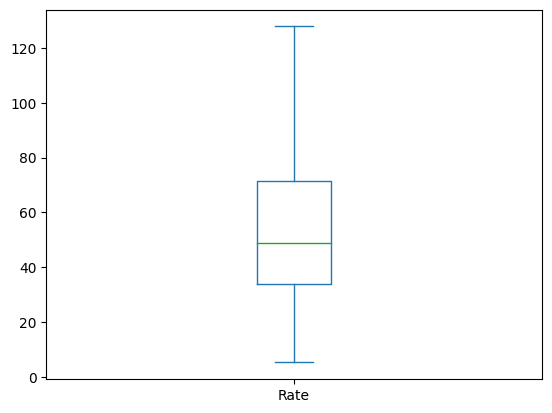

In [23]:
df_asthma_yr = df_asthma[["Rate", "Year"]]

# remove anything beyond Q3+1.5IQR and Q1-1.5IQR
df_asthma_yr.plot(x='Year', y='Rate', kind='box', showfliers=False)
plt.show()

In [26]:
df_subset2 = df_asthma[df_asthma['Strata'] == 'Total Population']
df_subset3 = df_asthma[df_asthma['Strata'] == 'Sex']
df_subset4 = df_asthma[df_asthma['Strata'] == 'Race-Ethnicity']
df_pivot2 = df_subset2[df_subset2['Year']==2012].pivot(index='Geography', values='Rate', columns='Strata Name')
df_pivot3 = df_subset2[df_subset2['Year']==2013].pivot(index='Geography', values='Rate', columns='Strata Name')
df_pivot4 = df_subset2[df_subset2['Year']==2014].pivot(index='Geography', values='Rate', columns='Strata Name')
df_pivot2['Year']=2012
df_pivot3['Year']=2013
df_pivot4['Year']=2014
df_concat = pd.concat([df_pivot2, df_pivot3, df_pivot4])
df_concat.head()

Strata Name,18 and Over,All Ages,Under 18,Year
Geography,,,,
Alameda,58.4,65.2,84.6,2012
Amador,81.9,83.5,88.0,2012
Butte,42.6,45.7,54.8,2012
Calaveras,42.5,43.5,46.5,2012
California,39.6,49.8,79.4,2012


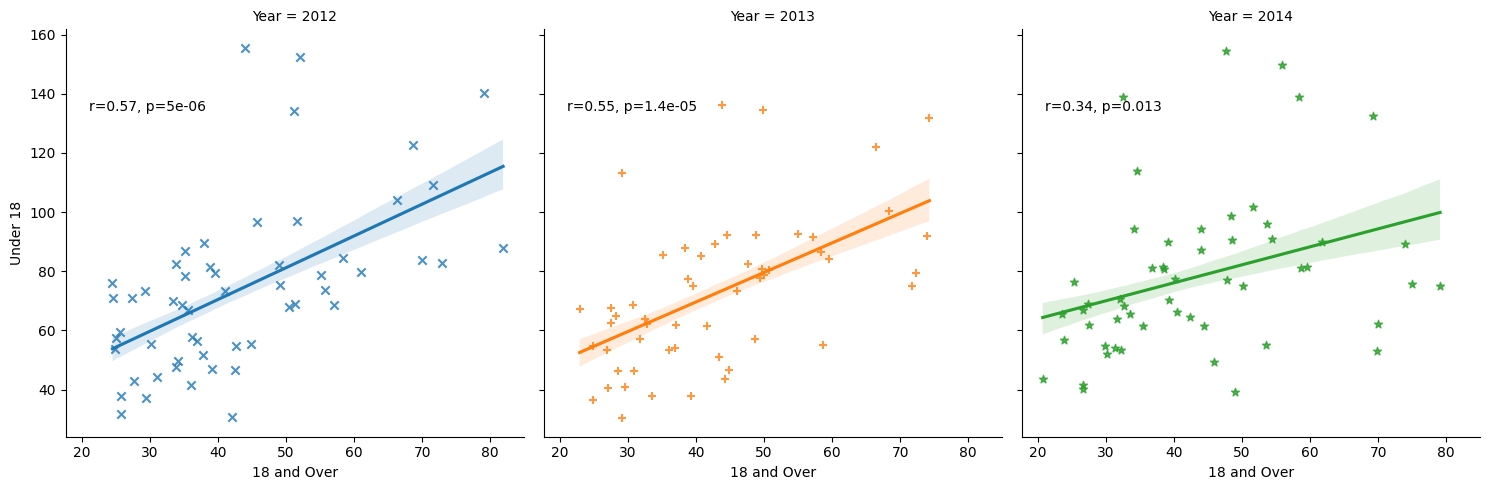

In [30]:
# W3-HW12

# For the example below, add R2 values on each of the linear regression plots. Make sure the values are correctly calculated for each year.
# Get the dataframe from the W3 lecture notes.

#### problem with this is the function annoatate should take in each plot, replacing the df used in line 24 with data, which is the argument for the function annotate will do

import seaborn as sns
import scipy as sp


df_concat = df_concat.dropna()

g = sns.lmplot(data=df_concat,
           x='18 and Over', y='Under 18',
           hue='Year',                 # we want to display each year separately
           markers=['x', '+', '*'],    # change how each year's marker is displayed
           ci=68,                      # change the confidence interval for the shading
           fit_reg=True,               # change to False if you want to remove the regression
           col='Year',                 # split the graph into subgraphs (can also use 'row')
          )

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['18 and Over'], data['Under 18'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

g.map_dataframe(annotate)
plt.show()

